# Background

This was the first notebook I had created in the repository, and is mainly a refresher on undergrad wave topics such as double-slit and Fraunhofer interference patterns. Note that I think the $1/r$ terms 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Waves

For a point-source 2D scalar wave being produced at the origin, its equation is the real part of:

$$\psi(\vec{r}) = \psi_0/r \cdot e^{i(kr-\omega t)}$$

Where $\psi_0$ is the amplitude, $k=2 \pi / \lambda$ is the wavenumber, $\omega$ is the frequency, and $r = \sqrt{x^2+y^2}$ is the distance from the origin. The intensity is given by $I(\vec{r}) = \psi_0^2 / r^2$.

An example is plotted below.

C:\Users\scott\AppData\Local\Temp/ipykernel_34716/362923859.py:5: RuntimeWarning: divide by zero encountered in true_divide
  z = np.exp(1.j*k*r) * np.minimum(10, 1/r)
C:\Users\scott\AppData\Local\Temp/ipykernel_34716/362923859.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(x, y, np.real(z))
C:\Users\scott\AppData\Local\Temp/ipykernel_34716/362923859.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolormesh(x, y

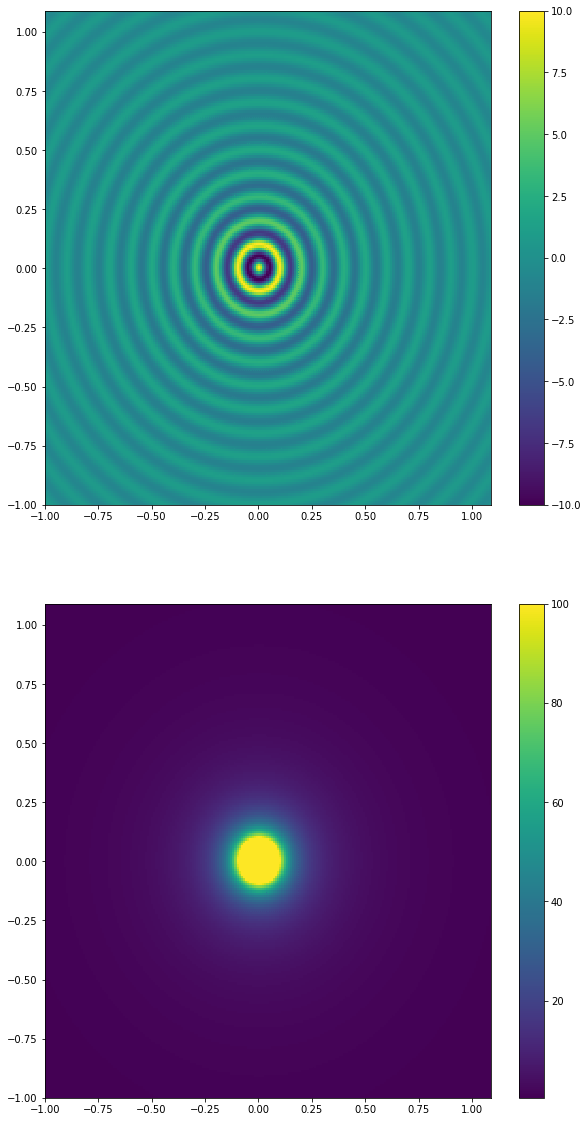

In [5]:
wavelength = 10
k = wavelength*2*np.pi
x,y = np.mgrid[-1:1.1:0.01, -1:1.1:0.01]
r = np.sqrt(x**2 + y**2)
z = np.exp(1.j*k*r) * np.minimum(10, 1/r)
fig, axs = plt.subplots(2, 1, figsize=(10, 20))
im1 = axs[0].pcolormesh(x, y, np.real(z))
im2 = axs[1].pcolormesh(x, y, np.real(z*np.conj(z)))
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

# Interference

If there are two point sources next to each other, their complex amplitudes will sometimes combine and sometimes cancel. If they cancel, their intensity will be zero. This phenomenon occurs in a double-slit, as each slit will produce a circular wavefront.

To solve the intensity analytically, we first setup the equation for amplitude:

$$\psi(\vec{x}) = \psi_0 \left[\frac{e^{i(k|\vec{x}-\vec{x_1}|-\omega t)}}{|\vec{x}-\vec{x_1}|} + \frac{e^{i(k|\vec{x}-\vec{x_2}|-\omega t)}}{|\vec{x}-\vec{x_2}|}\right]$$

In this case, $\psi_0$ is the max amplitude from a single source. We begin by solving for an approximation of $|\vec{x}-\vec{x_1}|$ and $|\vec{x}-\vec{x_2}|$. Let's assume that our two sources are spaced symmetrically a distance $d$ apart on the y-axis, putting them at $\vec{x_1}=(0,d/2)$ and $\vec{x_2}=(0,-d/2)$. Focusing on just the $\vec{x_1}$ term for now:

$$|\vec{x} - \vec{x_1}| = \sqrt{x^2 + (y-d/2)^2} = \sqrt{x^2 + y^2 - yd + d^2/4}$$

We can simplify by defining $r^2=x^2+y^2$. We can also safely drop the $d^2/4$ term if we assume $d<<|y|$, which is the case for a far-away screen from a tiny slit:

$$|\vec{x} - \vec{x_1}| \approx r \sqrt{1 - (yd/r^2)}$$

We can simplify further by recognizing that $y/r=\sin{\theta}$ and using the binomial approximation $(1-x)^\alpha \approx 1 - \alpha x$, where in this case $\alpha=2$:

$$|\vec{x} - \vec{x_1}| \approx r - (d/2) \sin{\theta}$$

The derivation for the $\vec{x_2}$ term is identical, except $-d/2$ is replaced by $d/2$:

$$|\vec{x} - \vec{x_2}| \approx r + (d/2) \sin{\theta}$$

Only the $r$ term matters for the denominators. In the exponents, there is a shared $e^{i(kr-\omega t)}$ term we can factor out, along with two interference terms:

$$\psi(\vec{x}) \approx \frac{\psi_0}{r} e^{i(kr-\omega t)} \left[e^{-i(kd/2)\sin{\theta}} + e^{i(kd/2)\sin{\theta}} \right]$$

Using the following trig identity:

$$cos{x} = \frac{1}{2}\left(e^{ix}+e^{-ix}\right)$$

The amplitude becomes:

$$\psi(\vec{x}) = \frac{2 \psi_0}{r} e^{i(kr-\omega t)} \cos{\left[(kd/2)\sin{\theta}\right]}$$

This can be re-written in terms of the wavelength using $k=2\pi/\lambda$:

$$\psi(\vec{x}) = \frac{2 \psi_0}{r} e^{i(kr-\omega t)} \cos{\left[(\pi d/\lambda)\sin{\theta}\right]}$$

The intensity is given by:

$$I(\vec{x}) = \frac{4 \psi^2_0}{r^2} \cos^2 \left( \frac{\pi d}{\lambda} \sin{\theta} \right) $$

The intensity can be re-written in terms of the total combined intensity from each source $I_0 = |\psi_1^2| + |\psi_2^2| = 2 \psi_0^2$:

$$I(\vec{x}) = \frac{2 I_0}{r^2} \cos^2 \left( \frac{\pi d}{\lambda} \sin{\theta} \right) $$

Numerical examples of 2D amplitude, 2D intensity, and intensity on the right edge are shown below.

C:\Users\scott\AppData\Local\Temp/ipykernel_34716/1282564583.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(x, y, np.real(z))
C:\Users\scott\AppData\Local\Temp/ipykernel_34716/1282564583.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolormesh(x, y, i, norm=colors.LogNorm(vmin=i.min(), vmax=i.max()))


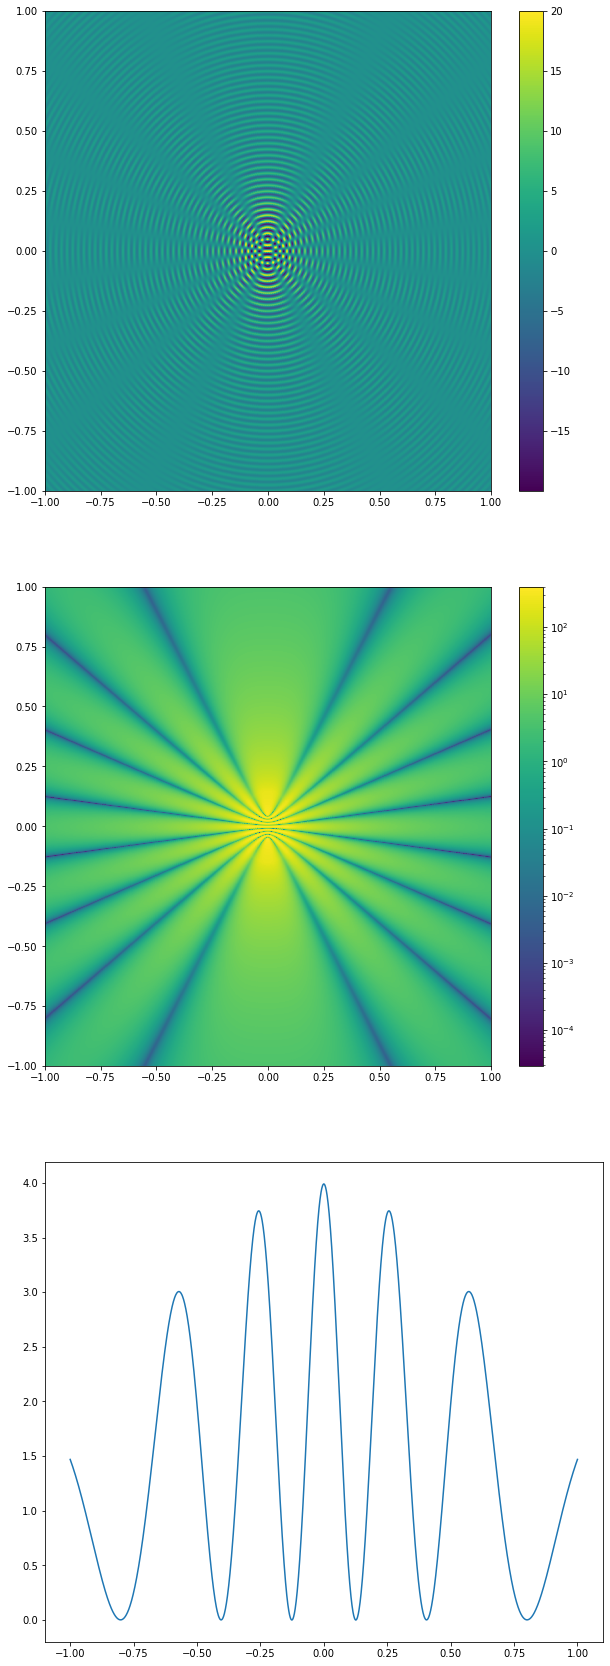

In [8]:
cutoff = 10
delta = 0.001
wavelength = 0.1
d = 0.1
n = 4
wavelength = d / n
k = 2*np.pi / wavelength
x,y = np.mgrid[-1:1+delta:delta, -1:1+delta:delta]
r1 = np.sqrt(x**2 + (y-(d/2))**2)
r2 = np.sqrt(x**2 + (y+(d/2))**2)
z1 = np.exp(1.j*k*r1) * np.minimum(10, 1/r1)
z2 = np.exp(1.j*k*r2) * np.minimum(10, 1/r2)
z = z1+z2
i = np.real(z*np.conj(z))
fig, axs = plt.subplots(3, 1, figsize=(10, 30))
im1 = axs[0].pcolormesh(x, y, np.real(z))
im2 = axs[1].pcolormesh(x, y, i, norm=colors.LogNorm(vmin=i.min(), vmax=i.max()))
axs[2].plot(y[-1,:], i[-1,:])
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

# Fraunhofer Diffraction

Suppose if instead of two slits, we had a continuous line of sources (eg a single opening) of width $a$. The amplitude becomes:

$$ \psi(\vec{x}) = \frac{\psi_0}{r} \int_{-a/2}^{a/2} e ^ {i ( k |\vec{x} - \vec{x'}(y')| - \omega t )} d y'$$

Where $\vec{x'}(y')$ is the vector with position $(0, y')$. Using similar reasoning as the double-slit, the exponent term simplifies to the following:

$$ |\vec{x} - \vec{x'}| = r - y' \sin{\theta} $$

Many of the terms come out of the integral:

$$ \psi(\vec{x}) = \frac{\psi_0}{r} e^{i(kr-\omega t)} \int_{-a/2}^{a/2} e ^ {- i k \sin{\theta} y' dy'}$$

The integral is easy to solve:

$$ \int e^{-ik\sin{\theta}}y'dy'=\frac{e^{-ik\sin{\theta}}}{-ik\sin{\theta}}$$

Using the trig identity:

$$ \sin{x} = \frac{e^{ix} - e^{-ix}}{2i} $$

Evaluating the integral at $-a/2$ and $a/2$ results in:

$$ \psi(\vec{x}) = \frac{\psi_0}{r} e^{i(kr-\omega t)} \cdot 2 \cdot \mbox{sinc}\left(\frac{ka}{2} \sin{\theta}\right)$$

And intensity:

$$ I(\vec{x}) = \frac{\psi_0^2}{r^2} \cdot 2 \cdot \mbox{sinc}^2\left(\frac{ka}{2} \sin{\theta}\right)$$

C:\Users\scott\AppData\Local\Temp/ipykernel_34716/2140437353.py:13: RuntimeWarning: divide by zero encountered in true_divide
  dz = np.exp(1.j*k*r) * np.minimum(10, 1/r)
C:\Users\scott\AppData\Local\Temp/ipykernel_34716/2140437353.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(x, y, np.real(z))
C:\Users\scott\AppData\Local\Temp/ipykernel_34716/2140437353.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolorme

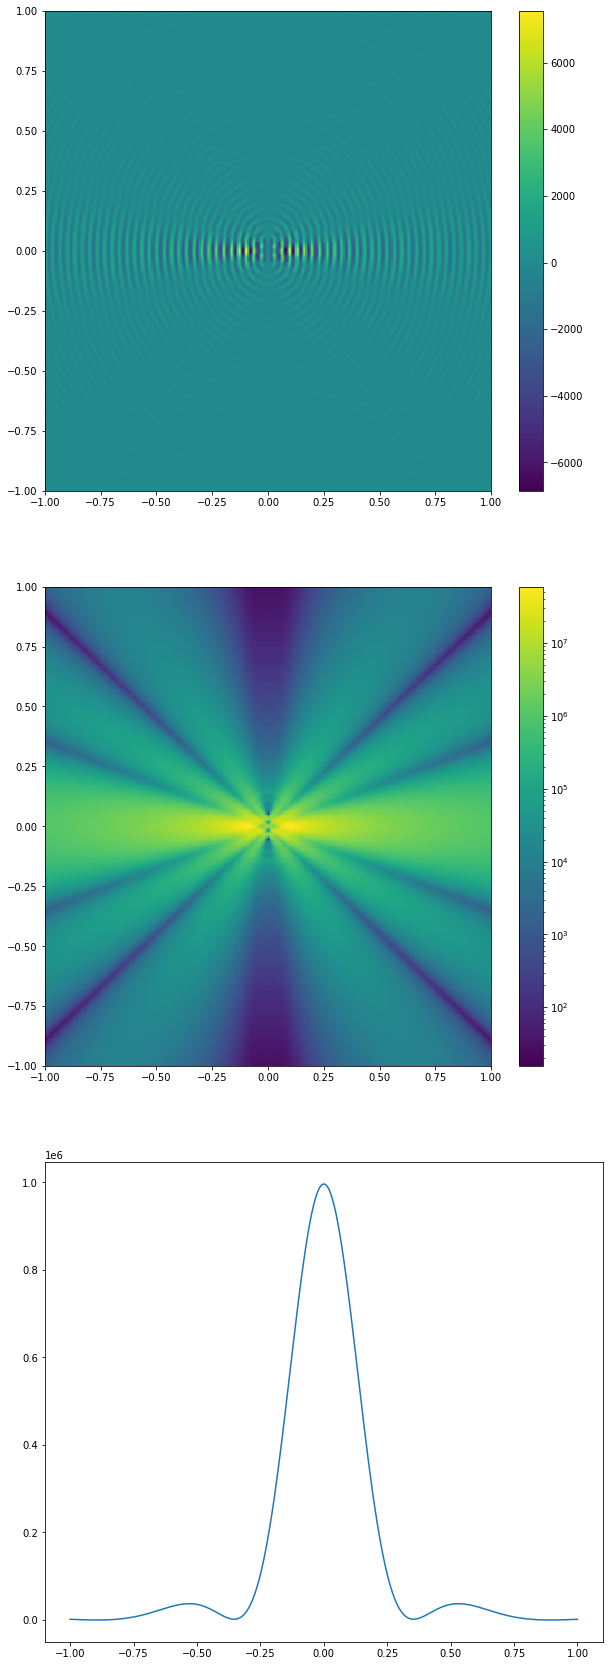

In [24]:
cutoff = 10
delta = 0.005
a = 0.2
n = 3
N = 1001
dy = np.linspace(-a/2, a/2, N)
wavelength = d / n
k = 2*np.pi / wavelength
x,y = np.mgrid[-1:1+delta:delta, -1:1+delta:delta]
z = None
for i in range(N):
    r = np.sqrt(x**2 + (y-(dy[i]/2))**2)
    dz = np.exp(1.j*k*r) * np.minimum(10, 1/r)
    if z is None:
        z = dz
    else:
        z += dz
i = np.real(z*np.conj(z))
fig, axs = plt.subplots(3, 1, figsize=(10, 30))
im1 = axs[0].pcolormesh(x, y, np.real(z))
im2 = axs[1].pcolormesh(x, y, i, norm=colors.LogNorm(vmin=i.min(), vmax=i.max()))
axs[2].plot(y[-1,:], i[-1,:])
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])